In [1]:
import os
import pandas as pd
import json
import pickle
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import prepare_data, load_source, slice_d

/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [12]:
with open('../data/Asteria_Eng_ver5.1_dic.pickle', 'rb') as f:
    problems_dic = pickle.load(f)

## 学習者によらない正解率を出す

In [2]:
data = load_source('Asteria_Eng_ver5')

correct_count = defaultdict(int)
wrong_count = defaultdict(int)

for seq in data:
    for x in seq:
        if x[1] == 1:
            correct_count[x[0]] += 1
        else:
            wrong_count[x[0]] += 1

correctness = []
for sid in correct_count.keys():
#     print('{:.2f} ({}/{})'.format(correct_count[sid] / (correct_count[sid]+wrong_count[sid]), correct_count[sid], correct_count[sid]+wrong_count[sid]))
    correctness.append(correct_count[sid] / (correct_count[sid]+wrong_count[sid]))

Over 0.80: 28.2%(92/326)


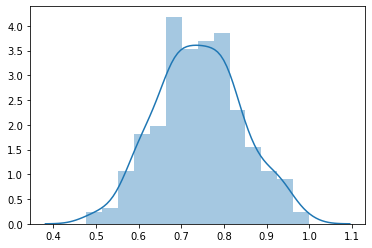

In [3]:
# correctness = np.array(correctness) 
over_080 = len([c for c in correctness if c > 0.8])
print('Over 0.80: {:.1f}%({}/{})'.format(over_080/len(correctness)*100, over_080, len(correctness)))
sns.distplot(correctness)

# スキルごとの正解率を出す

In [4]:
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
from src.config import Config
from knowledge_tracing.trainer import Trainer


In [21]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1424_seq20ks00_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1424_seq20ks00_ksdkt/checkpoints/ksdkt_auc0.6632_e700.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 5158
INFO:ksdkt:eval_dl.dataset size: 1321
INFO:ksdkt:The model has 558,904 trainable parameters


209 117


In [22]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1428_seq20ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1428_seq20ks05_ksdkt/checkpoints/ksdkt_auc0.6618_e700.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(20)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(20)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 5168
INFO:ksdkt:eval_dl.dataset size: 1311
INFO:ksdkt:The model has 558,904 trainable parameters


214 112


In [24]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1433_seq11ks00_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1433_seq11ks00_ksdkt/checkpoints/ksdkt_auc0.6216_e300.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 11123
INFO:ksdkt:eval_dl.dataset size: 2991
INFO:ksdkt:The model has 558,904 trainable parameters
/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([11, 1, 1])) that is different to the input size (torch.Size([11, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


219 107


In [25]:
projectdir = Path('/code')
assert projectdir.exists(), 'you are not in docker environment'
with open(projectdir / 'output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/report/ksdkt.json') as f:
    config_dict = json.load(f)['config']
    config_dict['exp_name'] += 'jupyter'
    config_dict['batch_size'] = 1
    config_dict['load_model'] = \
        '../output/z_1128_ksdkt/20191128-1441_seq11ks05_ksdkt/checkpoints/ksdkt_auc0.6401_e900.model'
config = Config(config_dict, projectdir=projectdir)
trainer = Trainer(config)
# trainer.evaluate_model()

good = 0
bad = 0

for v in problems_dic.values():
    # wrong
    wro = trainer.model(torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,0) for _ in range(11)]).unsqueeze(0))
    wro = wro['pred_prob']
    # correct
    cor = trainer.model(torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0),
                        torch.Tensor([(v,1) for _ in range(11)]).unsqueeze(0))
    cor = cor['pred_prob']
    if (cor - wro)[-1].item() < 0:
        bad += 1
    else:
        good += 1
        
print(good, bad)

INFO:ksdkt:PyTorch: 1.3.0
INFO:ksdkt:Using Device: cuda
INFO:ksdkt:train_dl.dataset size: 11351
INFO:ksdkt:eval_dl.dataset size: 2763
INFO:ksdkt:The model has 558,904 trainable parameters


224 102


In [20]:
# simu = \
# [[1 if j > i else 0 for j in range(21)] for i in range(21)] + \
# [[0 if j > i else 1 for j in range(21)] for i in range(21)]
# simu

In [2]:
# for lo_id in problems_dic.keys():
#     preds = []
#     for s in simu:
#         res = predict_ks_from_history([{"lo_id": lo_id, "answer_result": a} for a in s])
#         pred = [r['skill_pred'] for r in res if r['lo_id'] == lo_id]
#         preds.append(*pred)
#     sns.lineplot([sum(s) for s in simu], preds)
#     plt.show()

### スケールを固定するバージョン

In [1]:
# for lo_id in problems_dic.keys():
#     preds = []
#     for s in simu:
#         res = predict_ks_from_history([{"lo_id": lo_id, "answer_result": a} for a in s])
#         pred = [r['skill_pred'] for r in res if r['lo_id'] == lo_id]
#         preds.append(*pred)
#     plt.ylim(0, 1)
#     sns.lineplot([sum(s) for s in simu], preds)
#     plt.show()

In [43]:
data = load_source('Asteria_Eng_ver5')

correct_count = defaultdict(int)
wrong_count = defaultdict(int)

for seq in data:
    for x in seq:
        if x[1] == 1:
            correct_count[x[0]] += 1
        else:
            wrong_count[x[0]] += 1

correctness = dict()
for sid in correct_count.keys():
#     print('{:.2f} ({}/{})'.format(correct_count[sid] / (correct_count[sid]+wrong_count[sid]), correct_count[sid], correct_count[sid]+wrong_count[sid]))
    correctness[sid] = (correct_count[sid] / (correct_count[sid]+wrong_count[sid]))

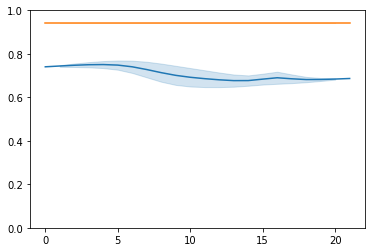

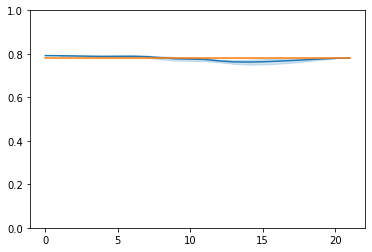

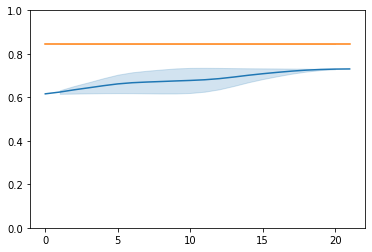

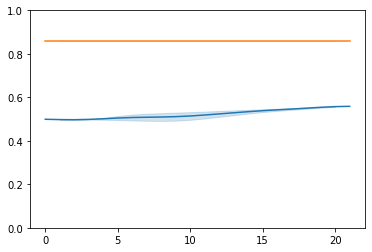

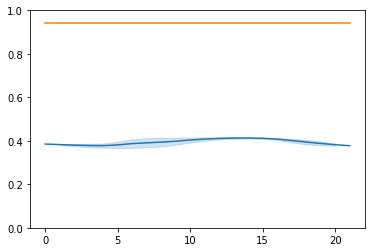

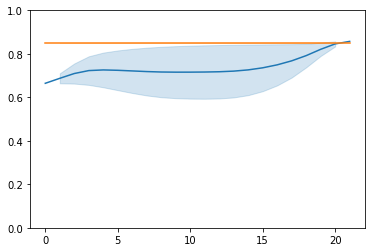

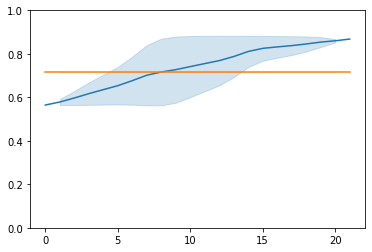

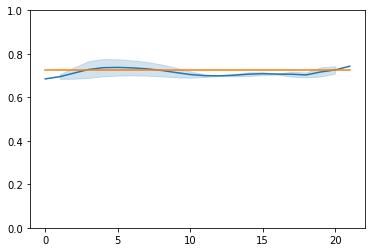

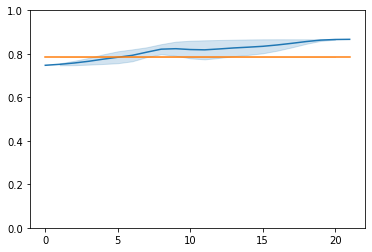

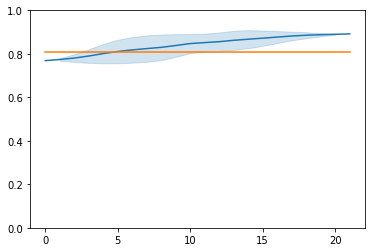

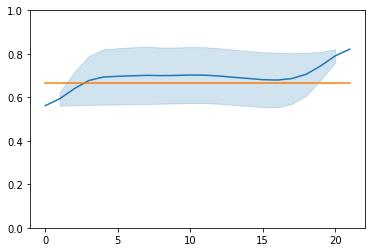

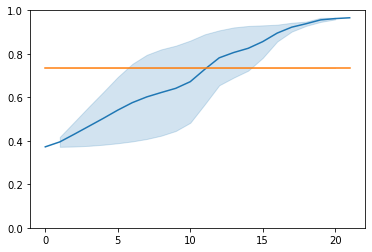

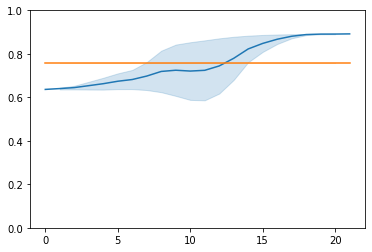

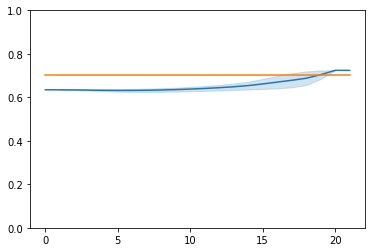

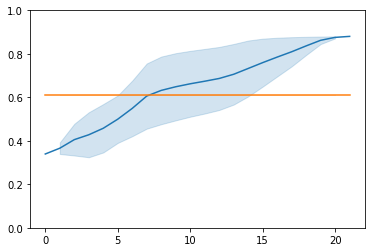

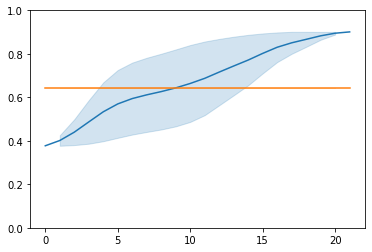

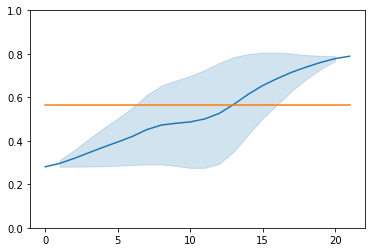

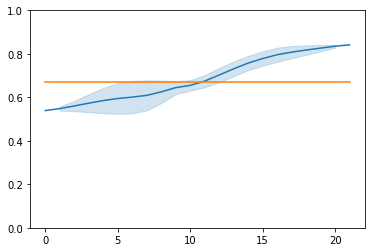

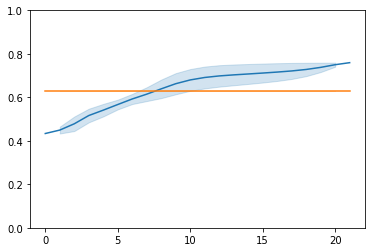

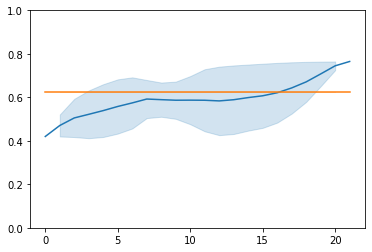

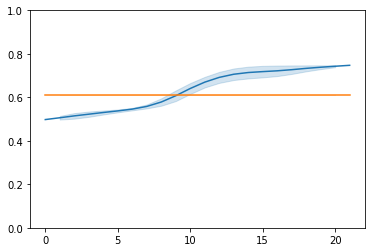

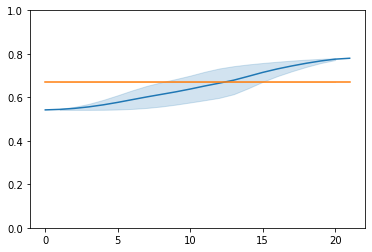

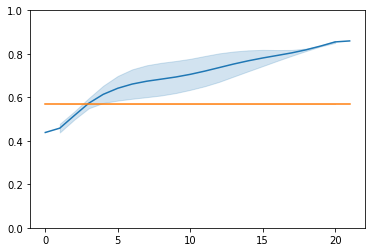

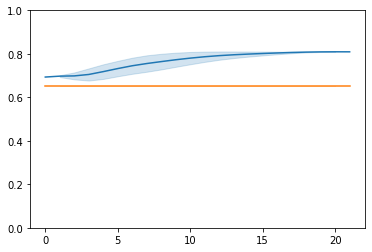

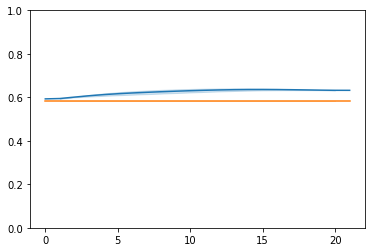

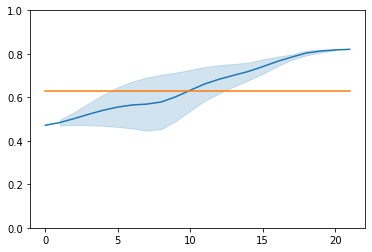

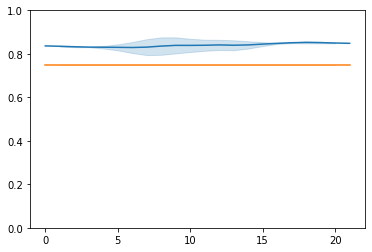

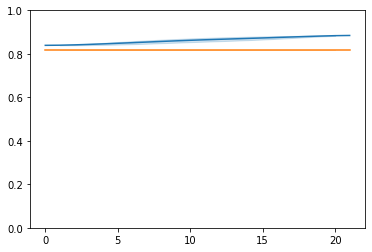

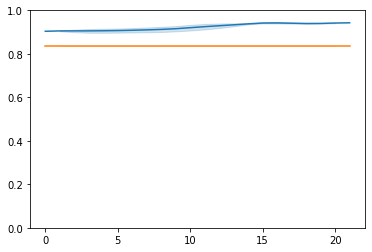

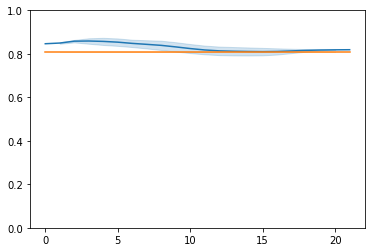

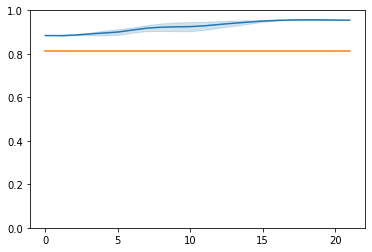

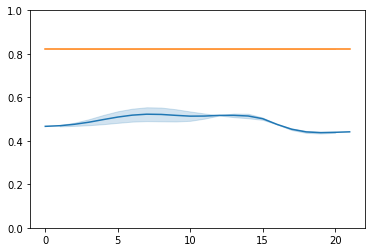

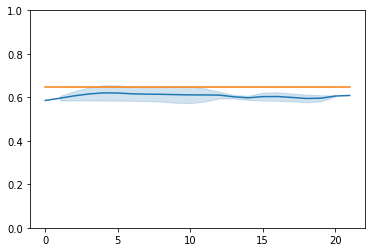

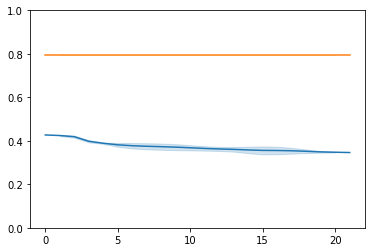

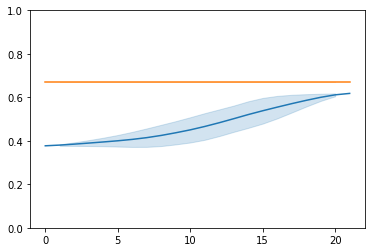

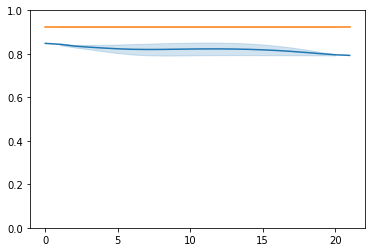

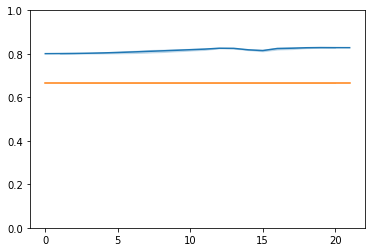

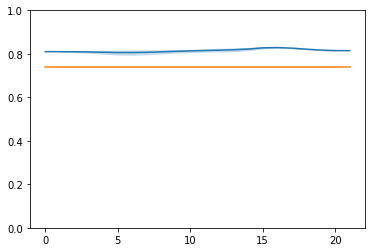

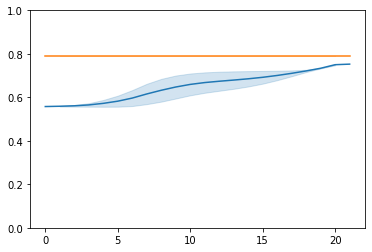

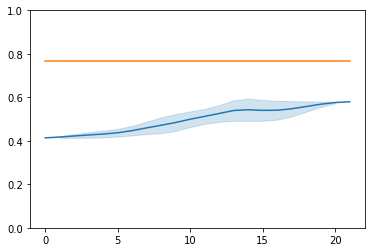

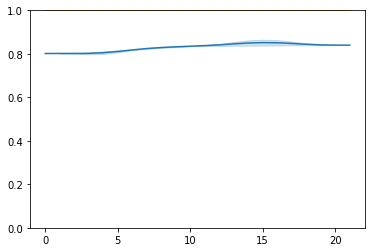

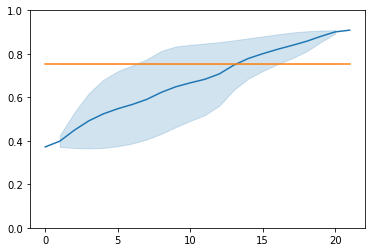

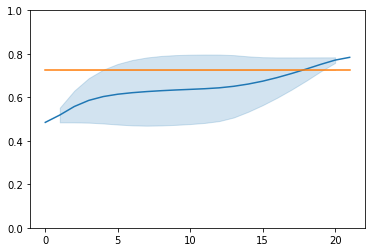

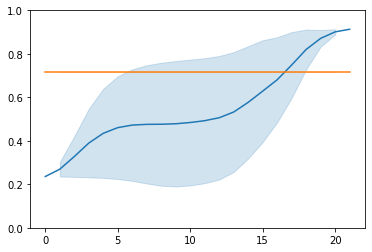

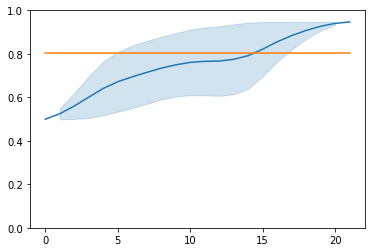

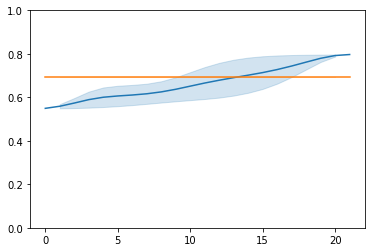

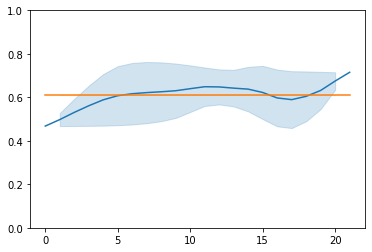

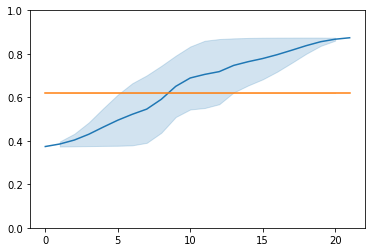

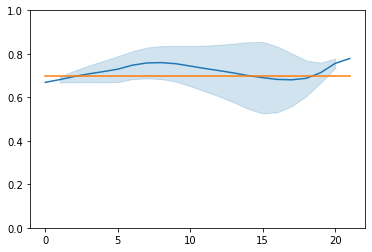

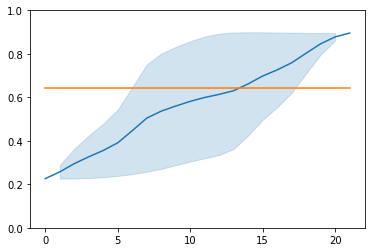

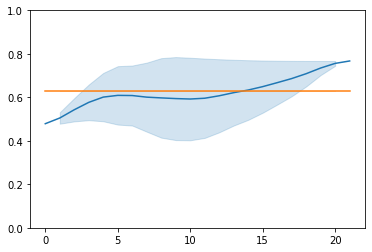

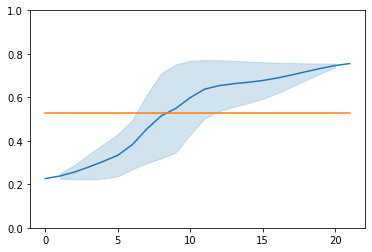

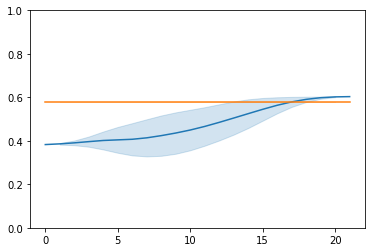

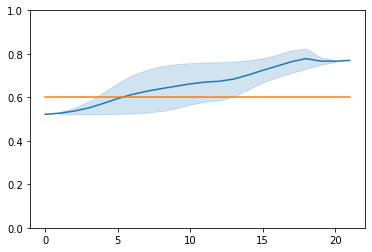

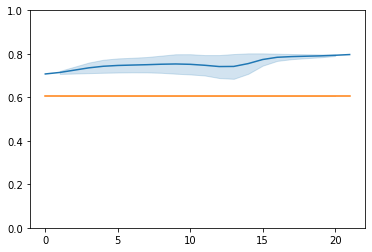

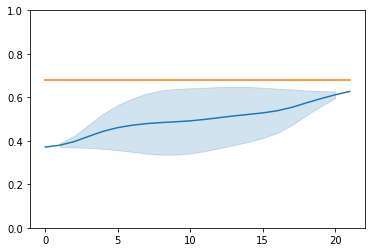

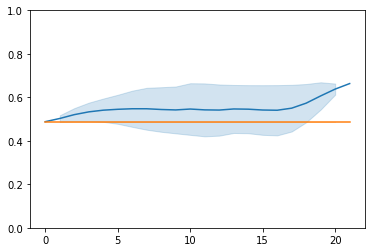

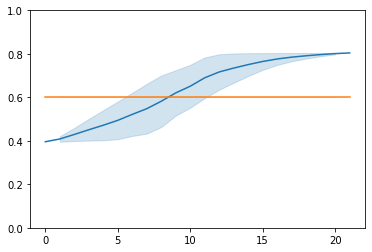

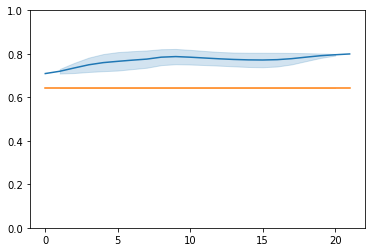

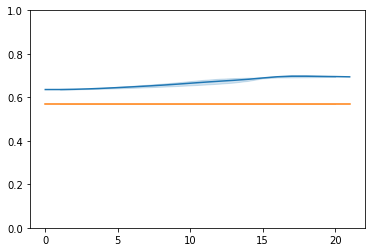

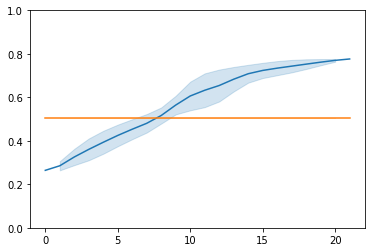

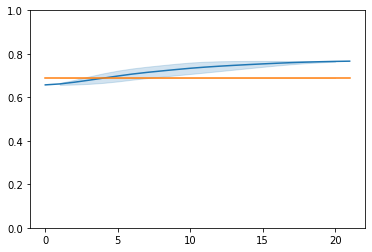

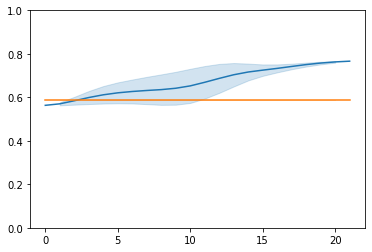

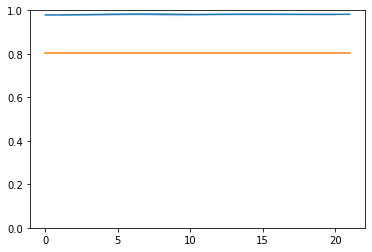

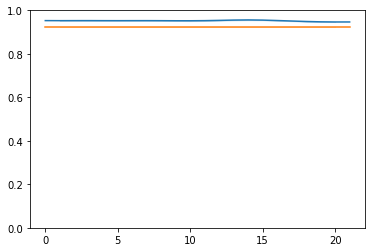

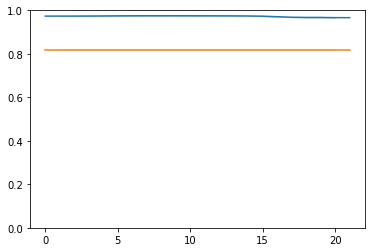

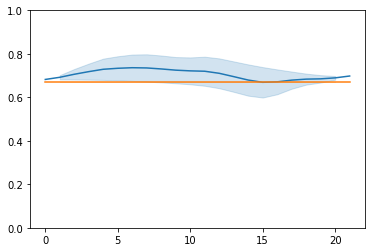

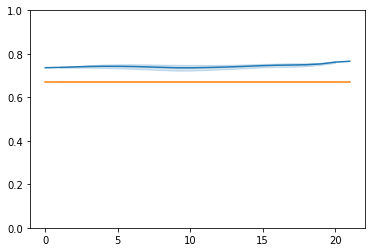

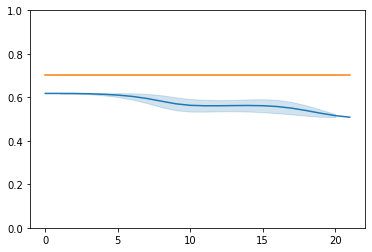

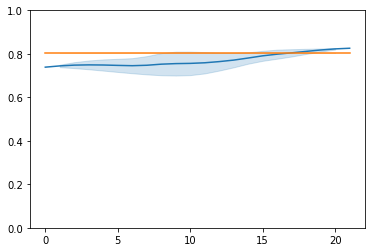

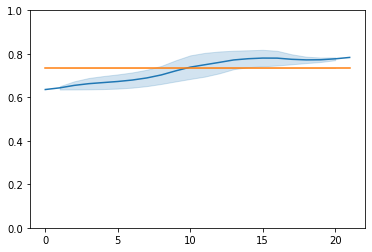

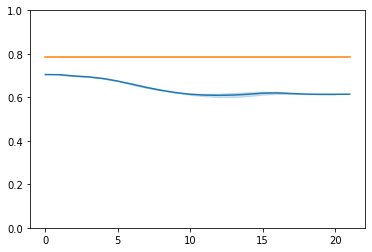

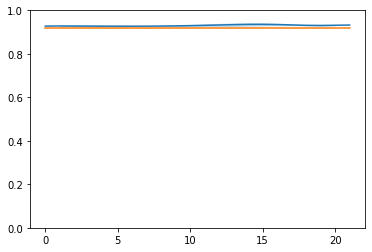

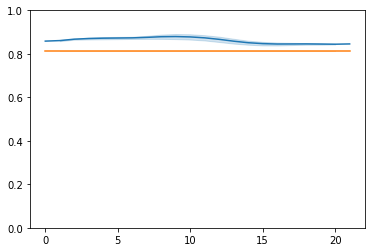

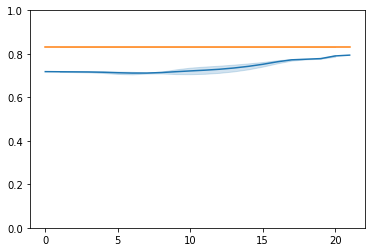

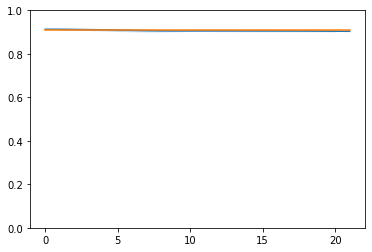

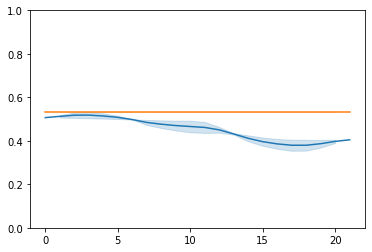

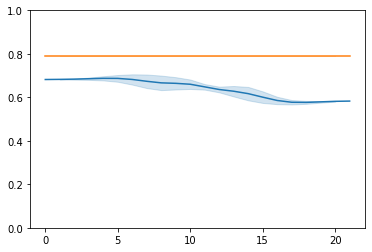

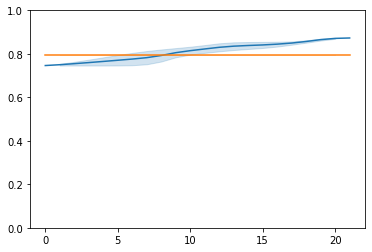

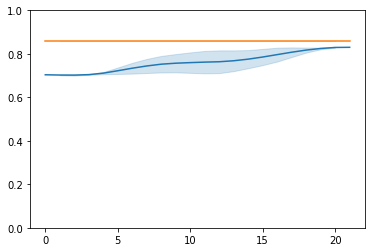

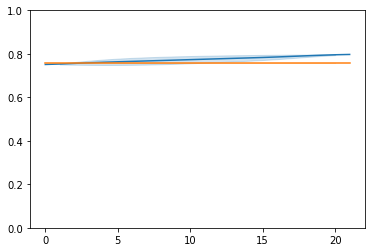

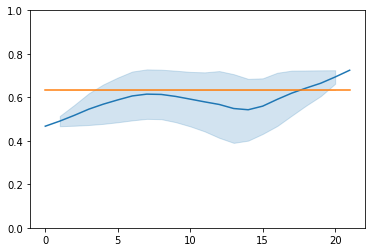

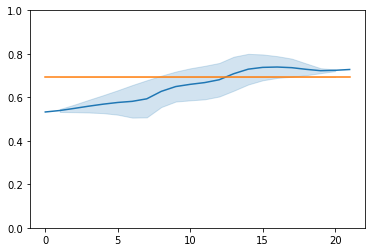

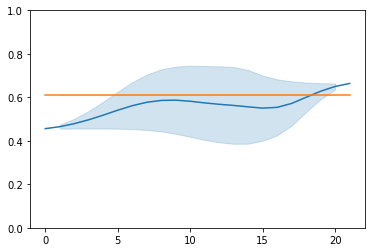

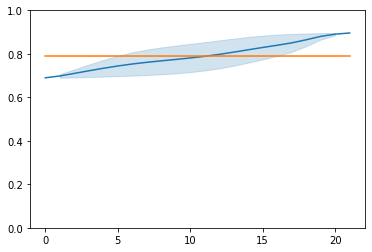

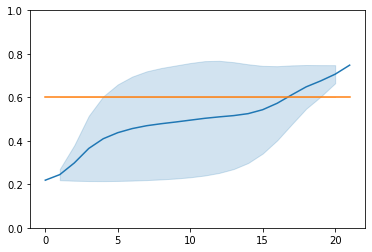

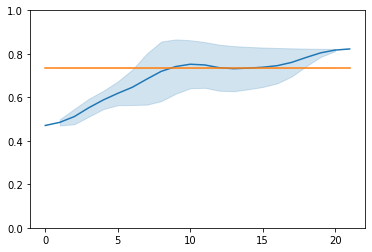

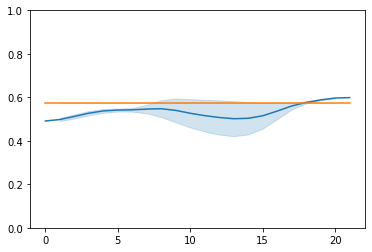

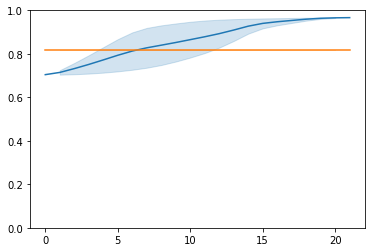

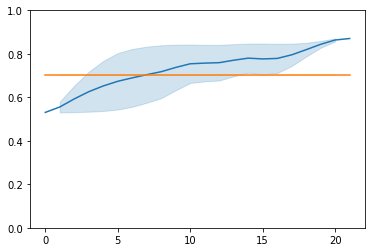

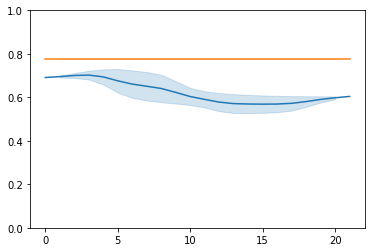

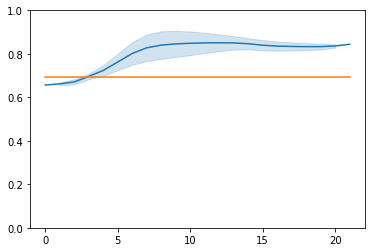

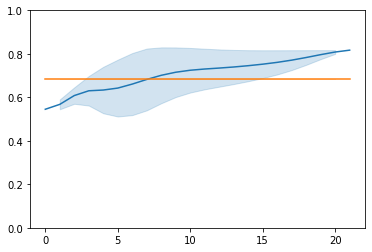

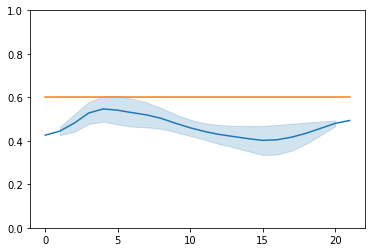

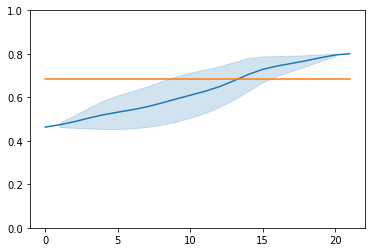

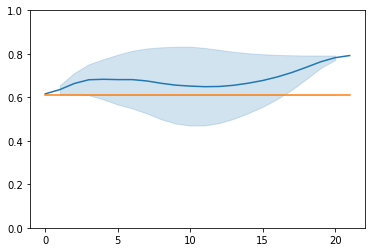

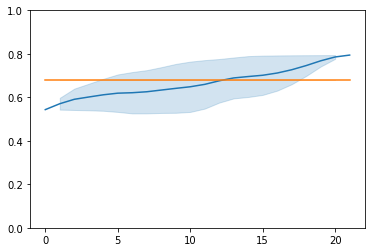

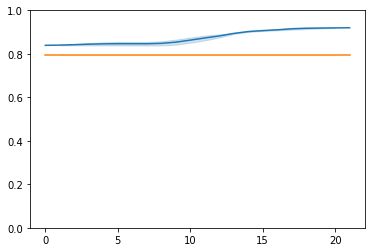

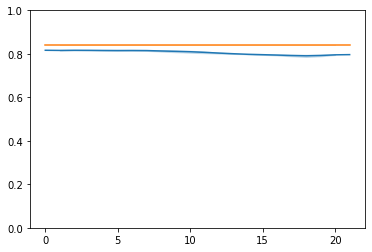

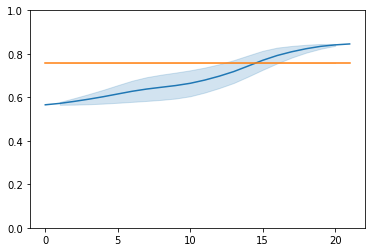

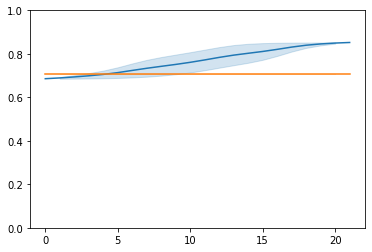

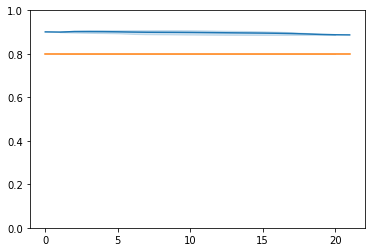

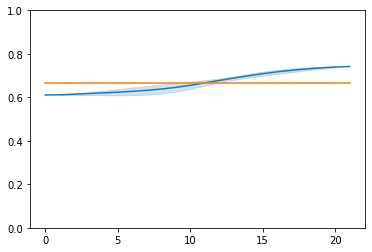

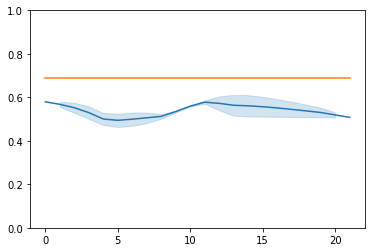

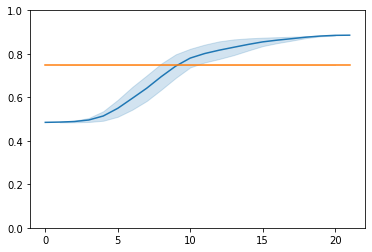

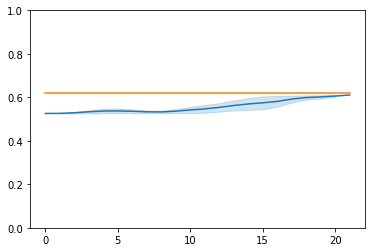

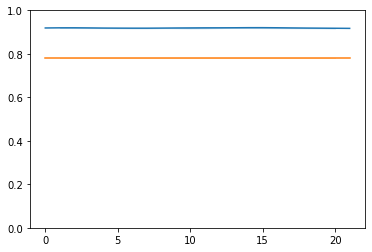

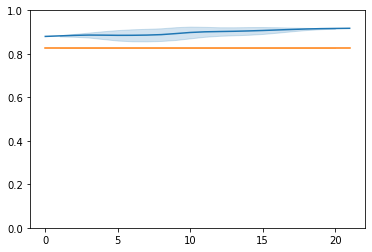

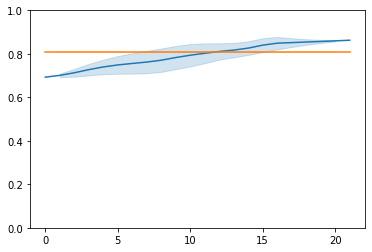

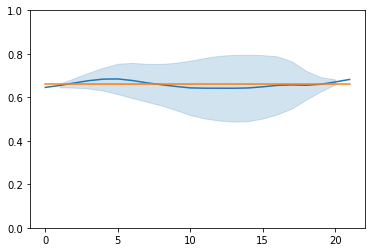

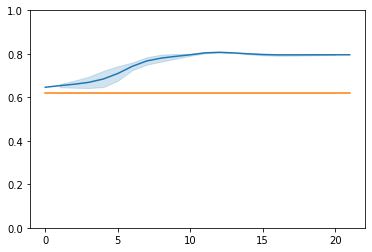

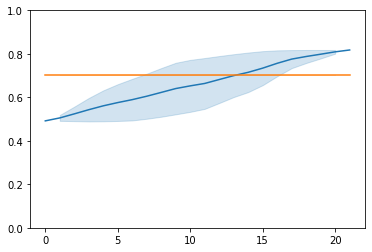

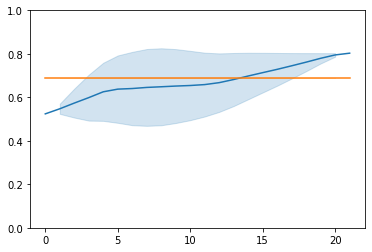

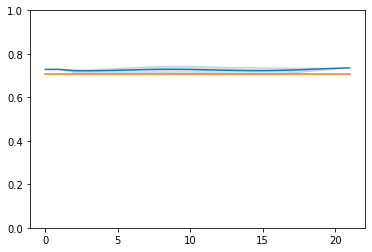

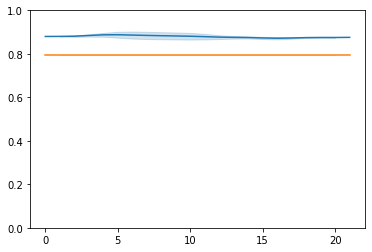

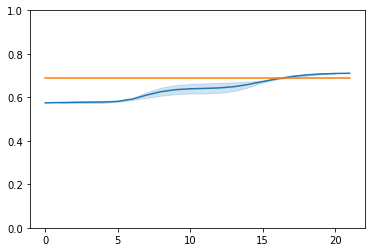

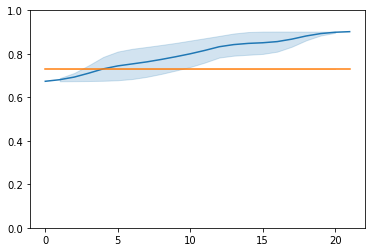

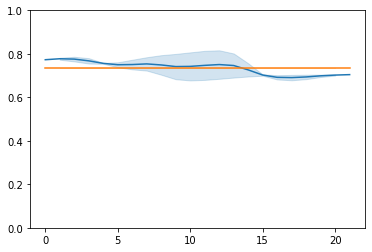

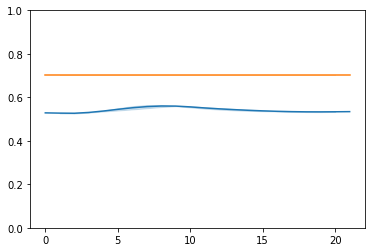

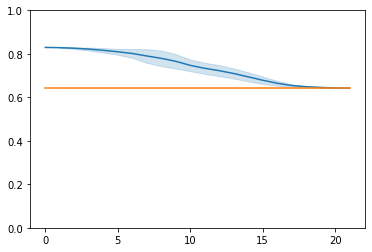

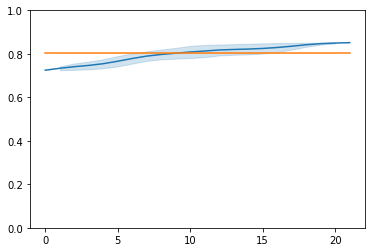

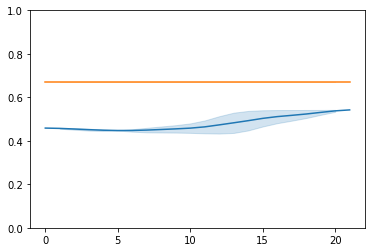

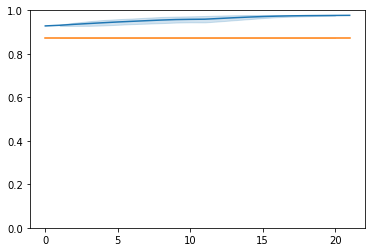

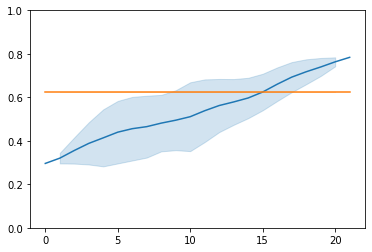

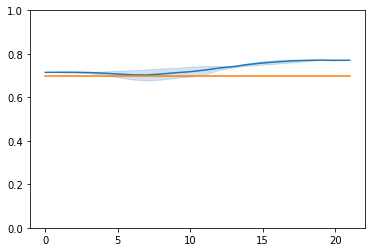

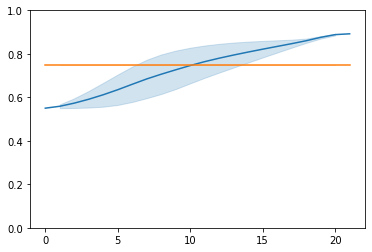

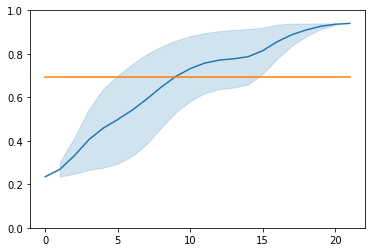

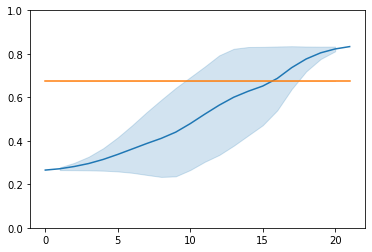

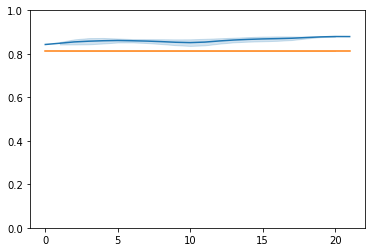

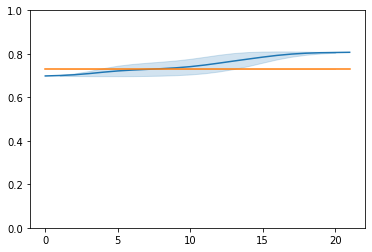

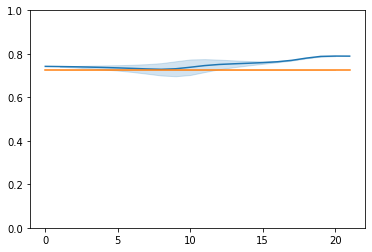

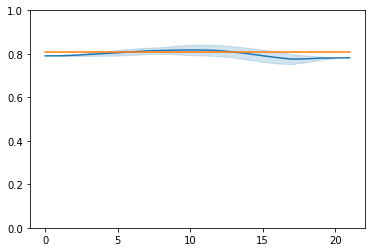

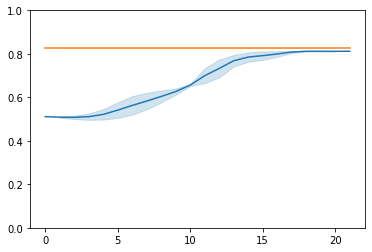

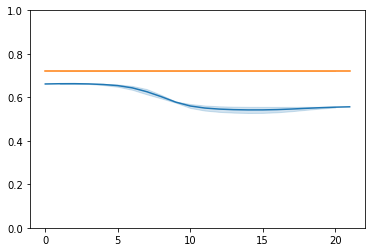

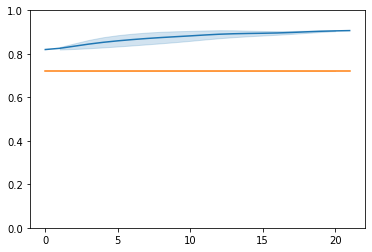

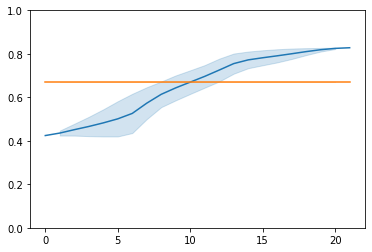

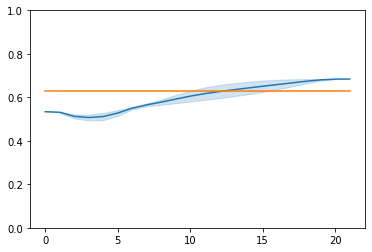

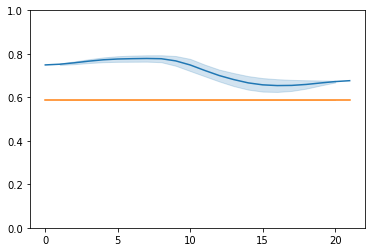

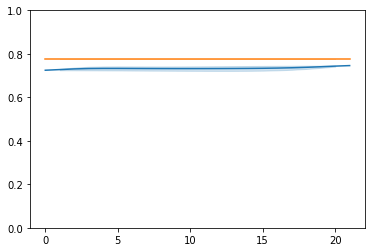

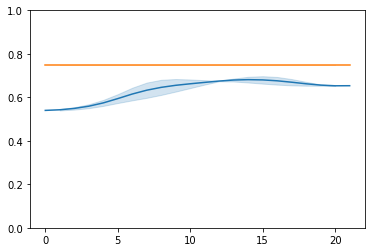

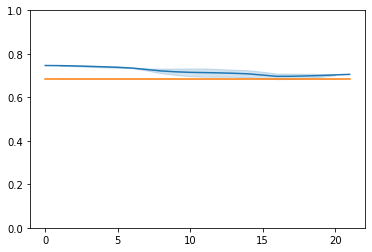

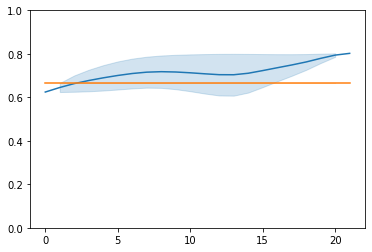

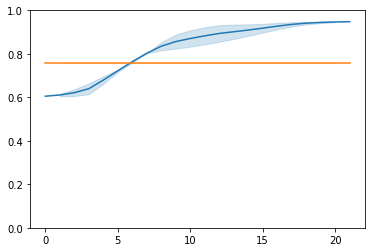

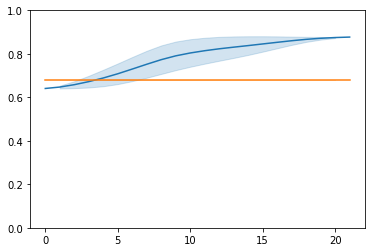

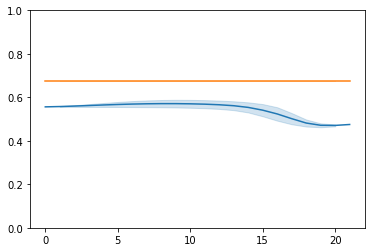

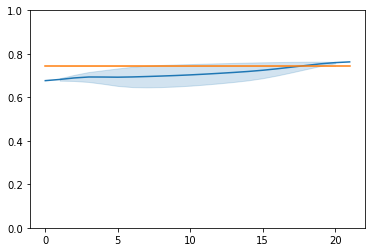

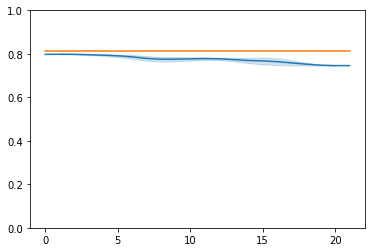

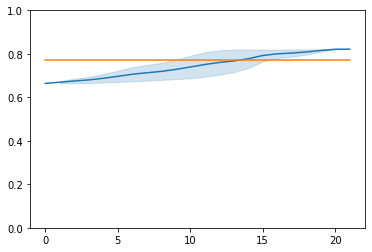

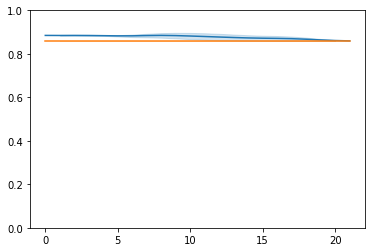

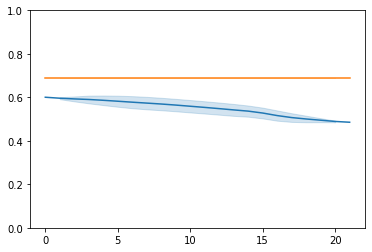

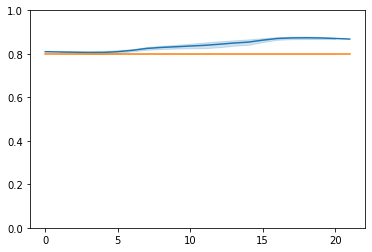

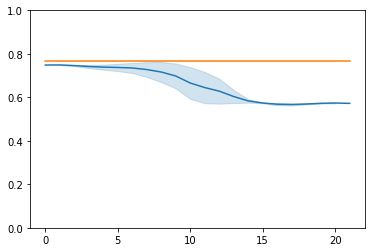

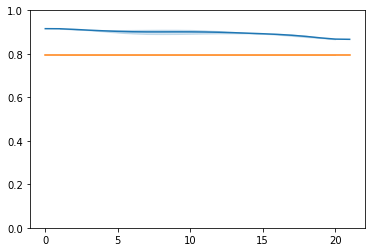

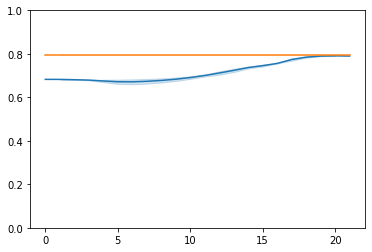

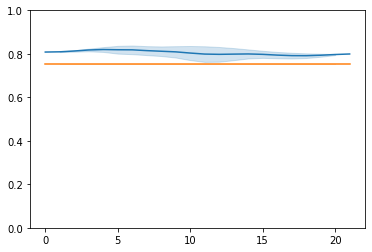

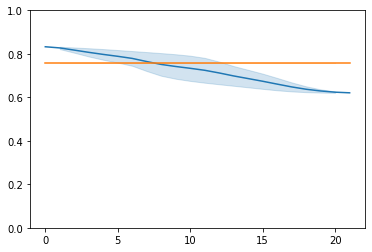

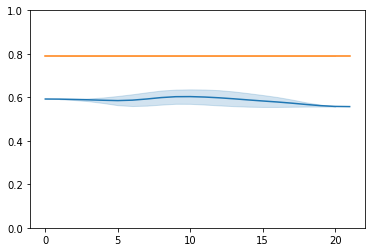

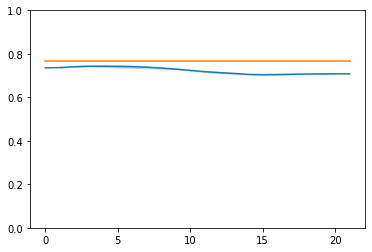

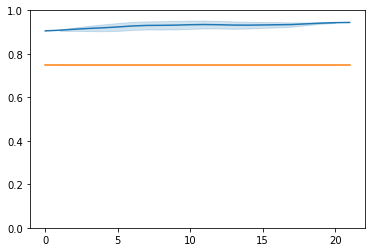

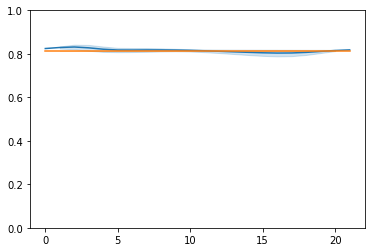

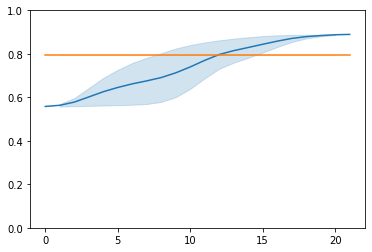

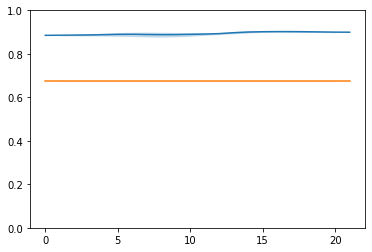

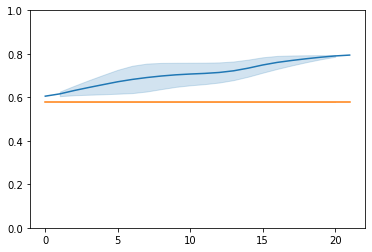

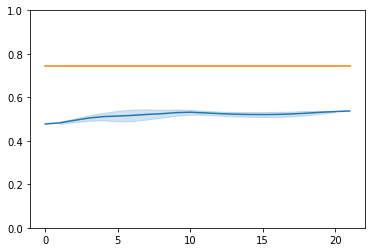

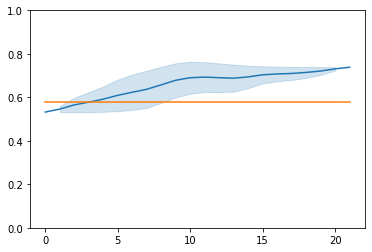

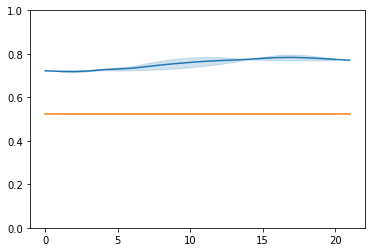

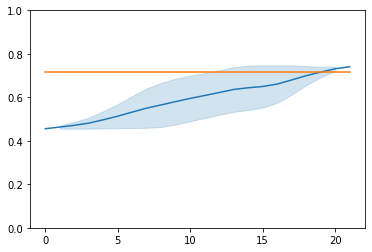

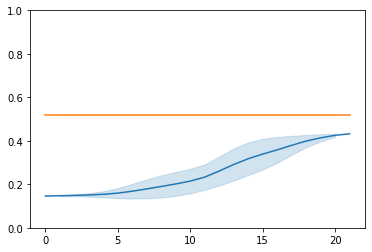

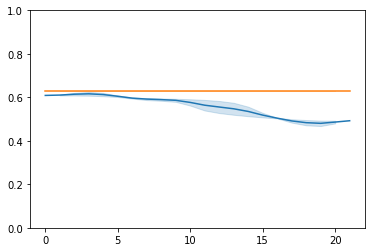

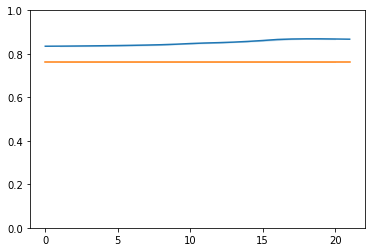

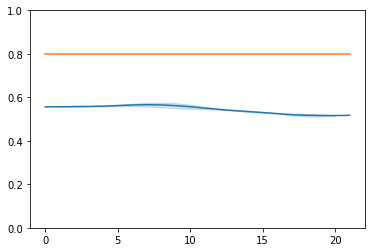

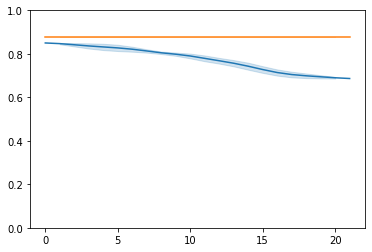

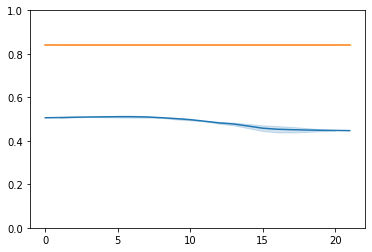

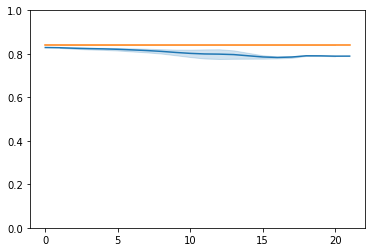

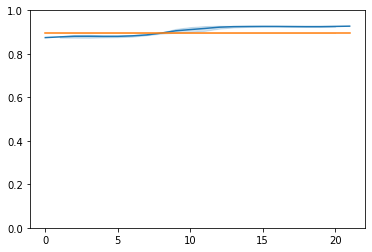

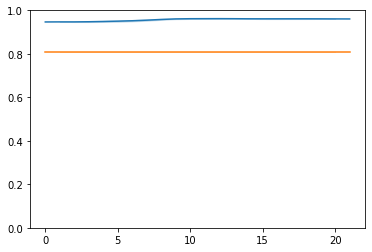

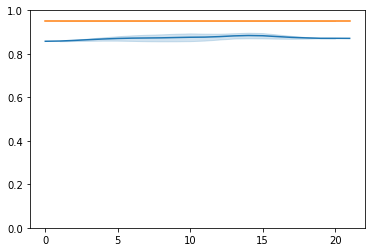

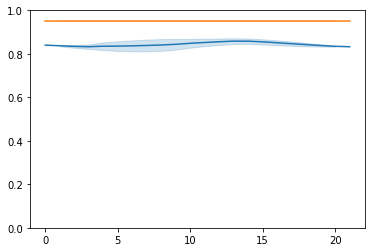

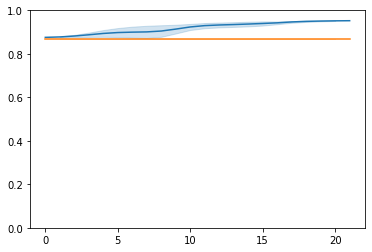

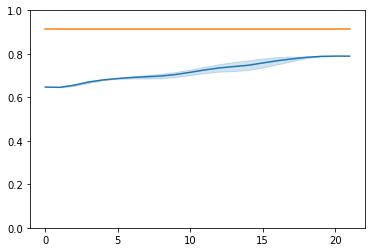

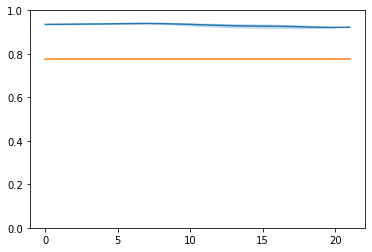

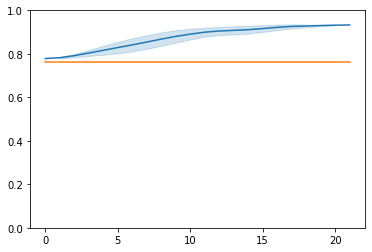

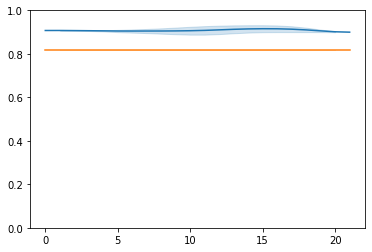

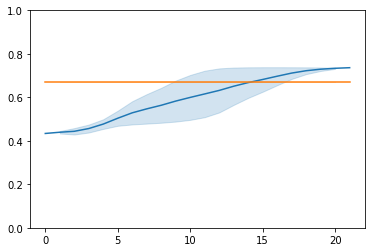

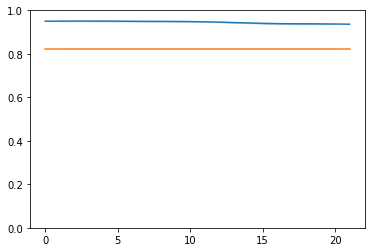

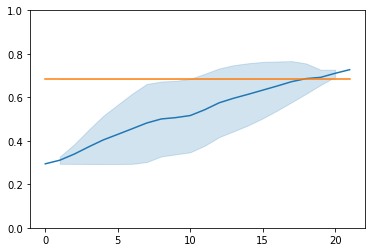

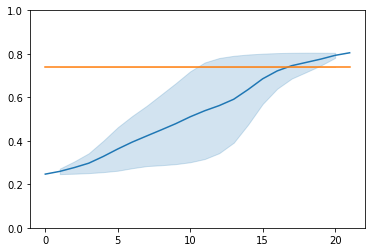

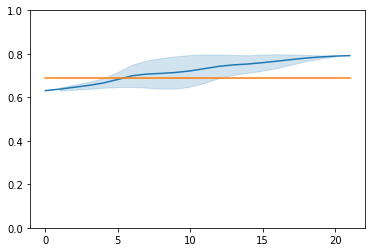

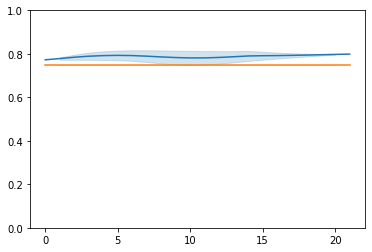

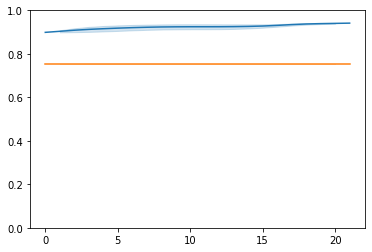

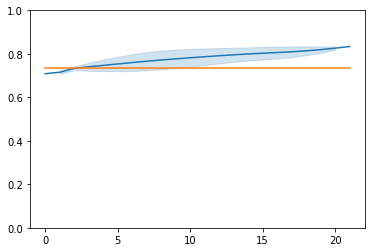

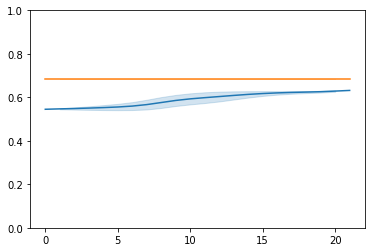

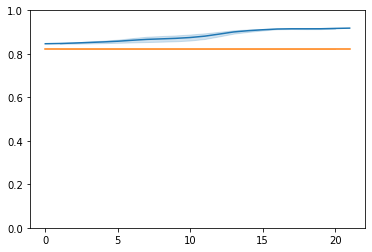

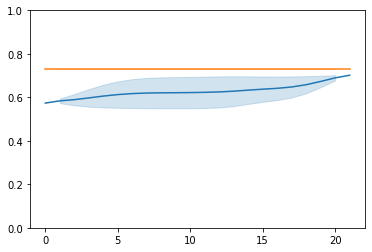

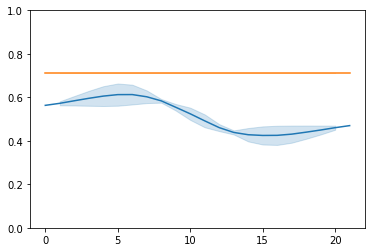

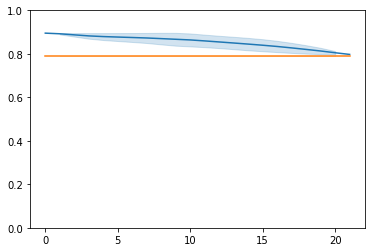

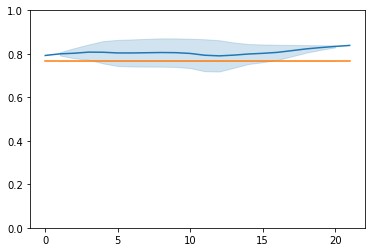

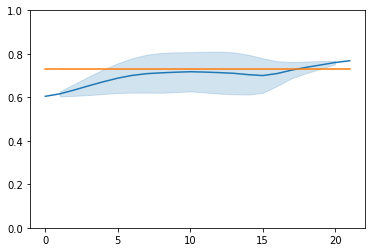

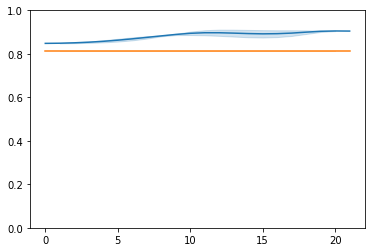

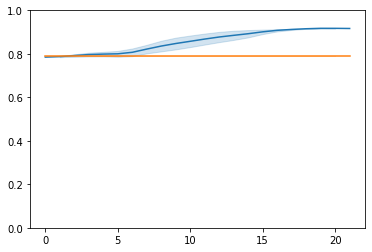

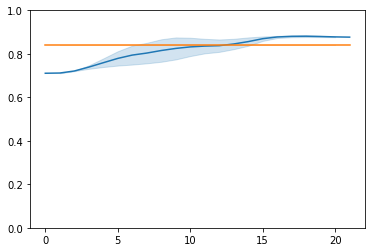

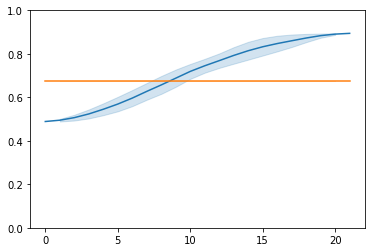

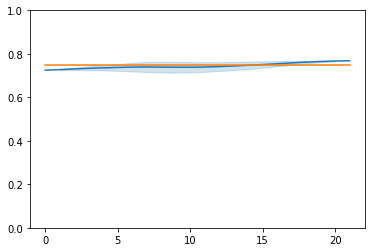

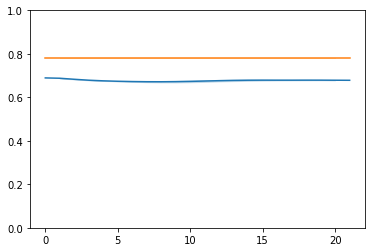

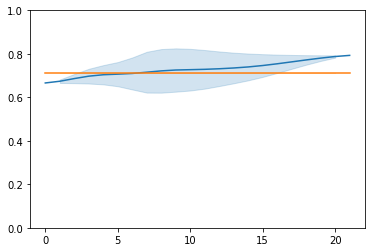

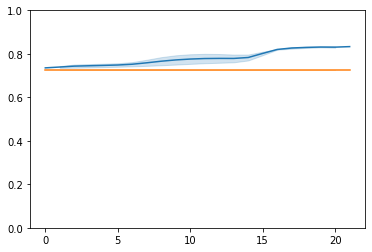

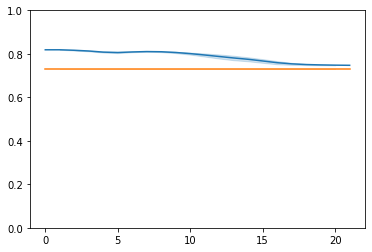

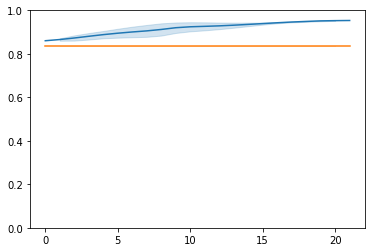

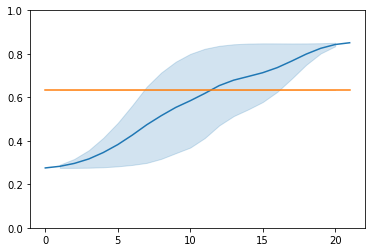

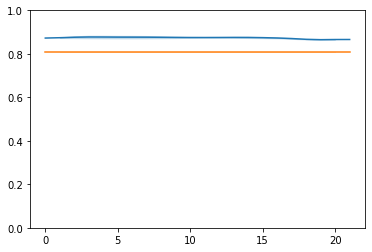

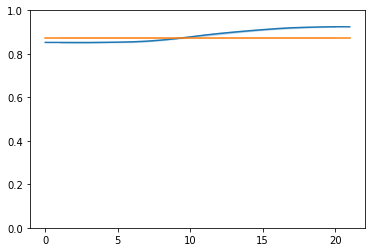

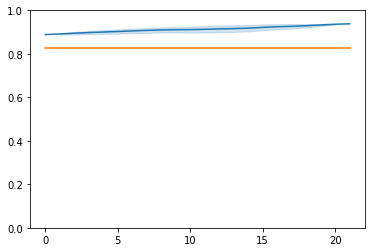

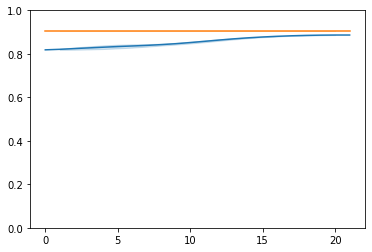

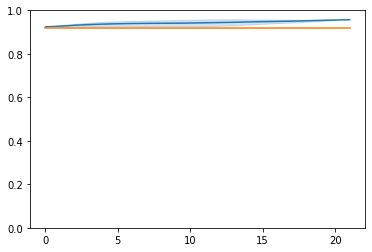

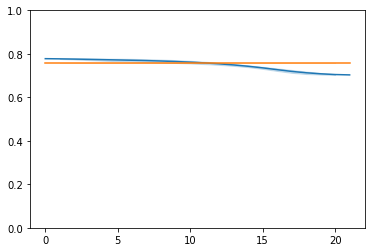

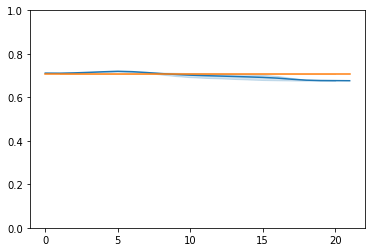

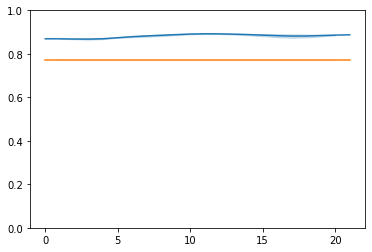

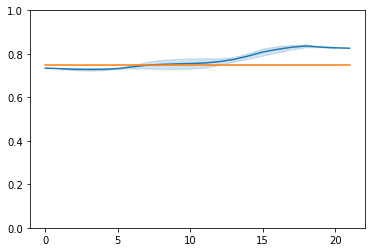

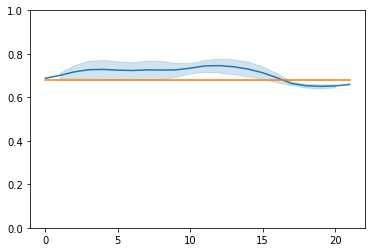

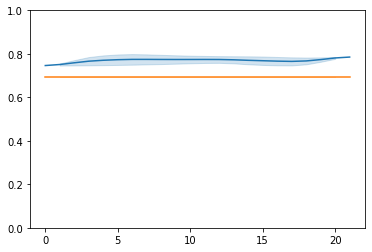

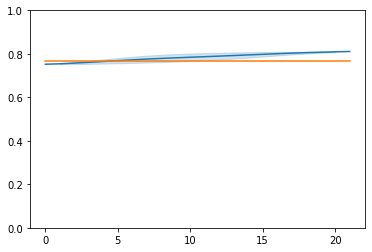

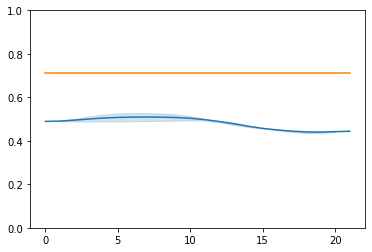

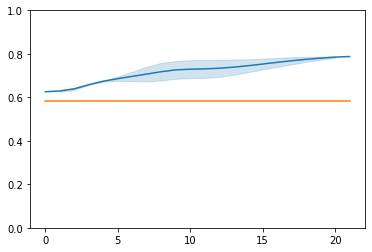

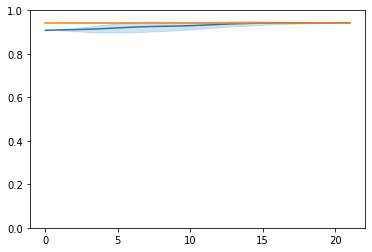

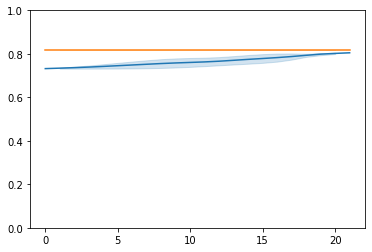

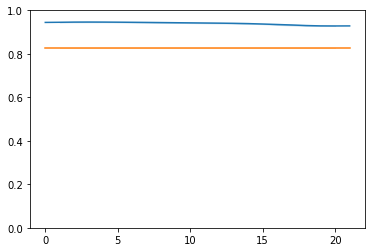

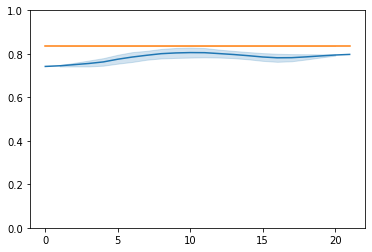

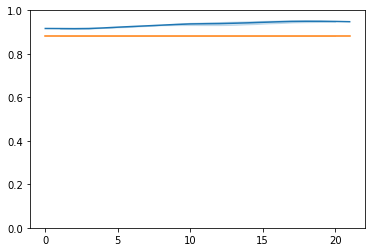

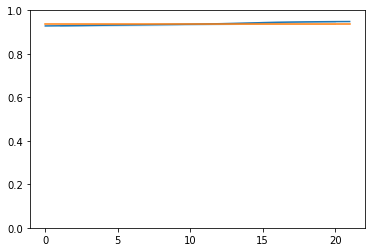

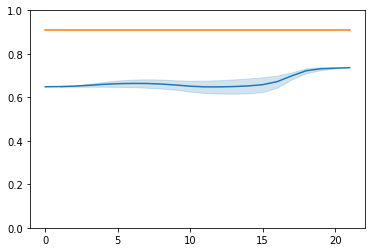

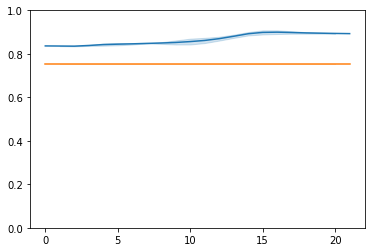

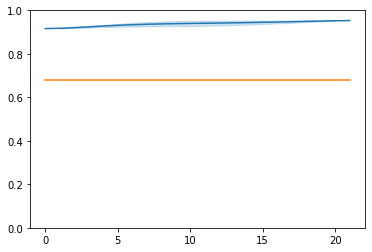

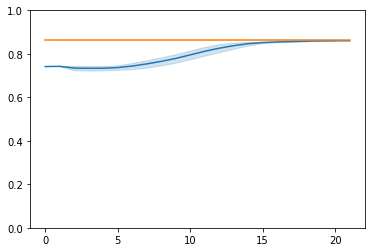

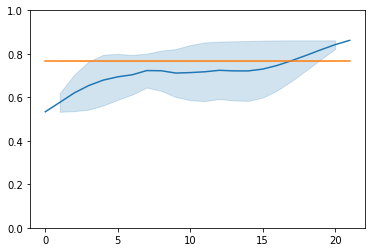

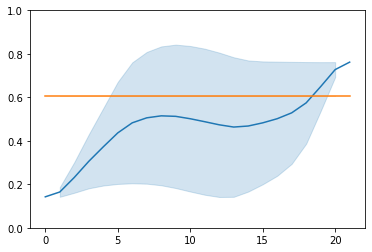

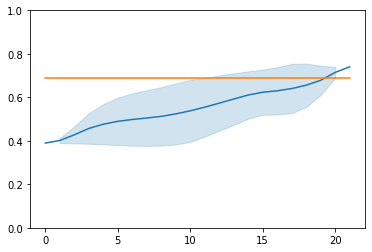

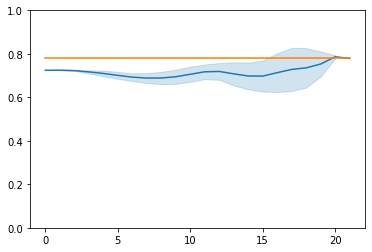

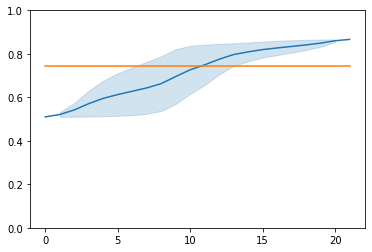

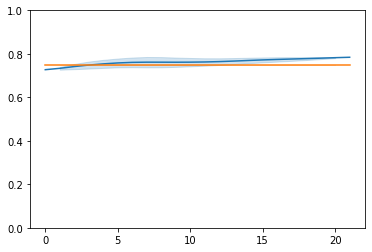

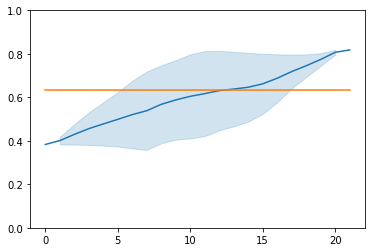

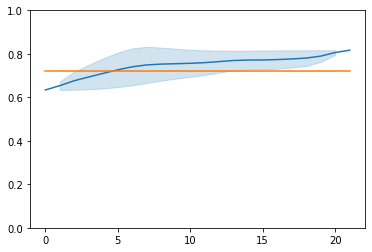

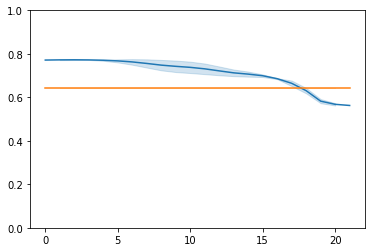

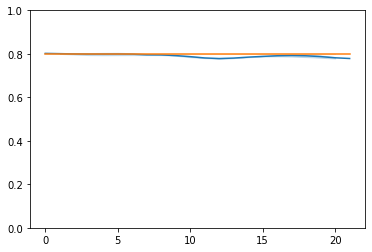

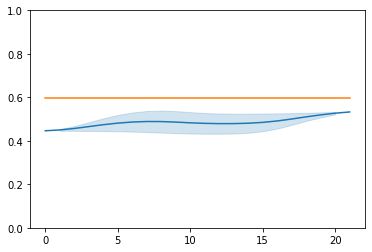

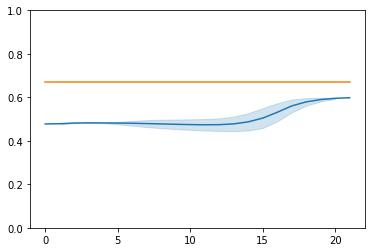

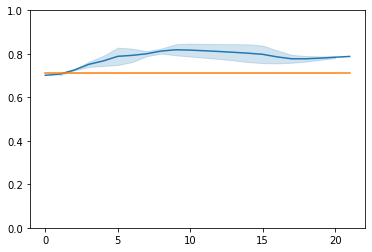

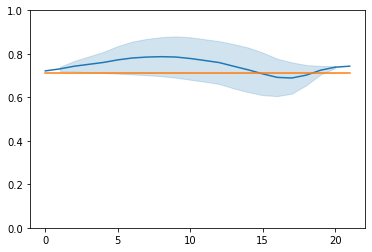

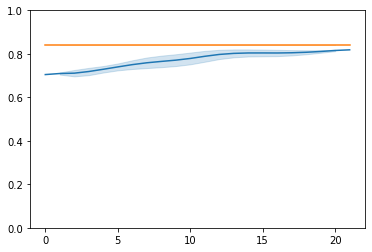

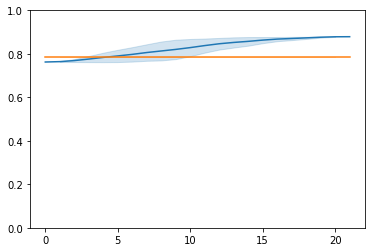

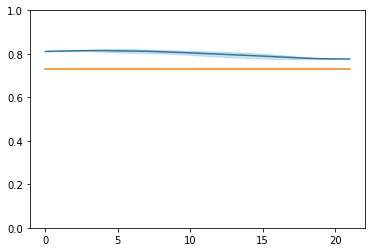

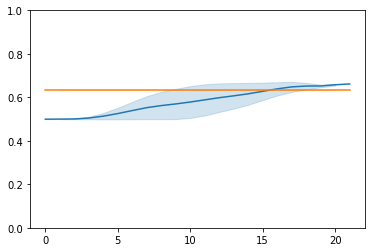

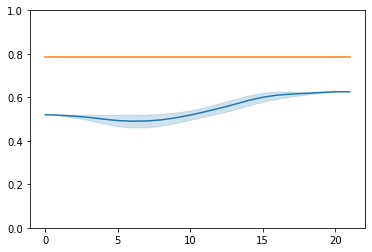

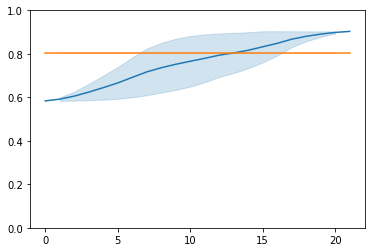

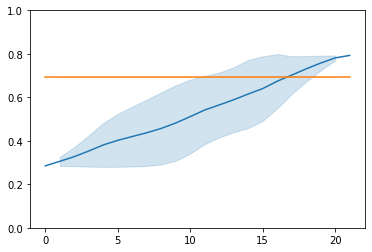

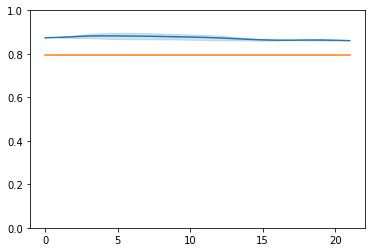

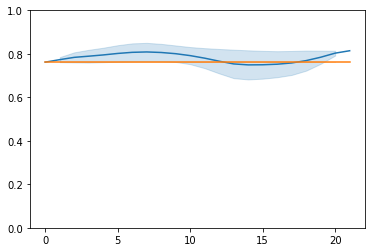

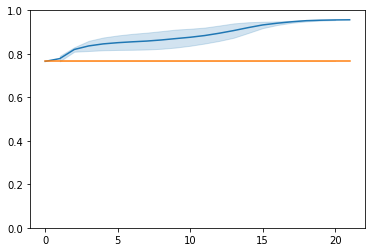

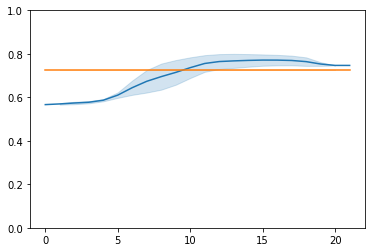

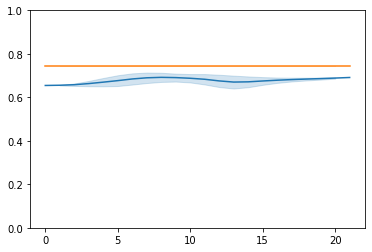

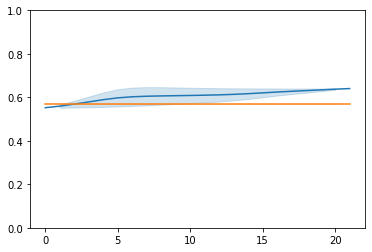

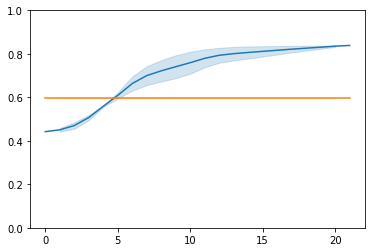

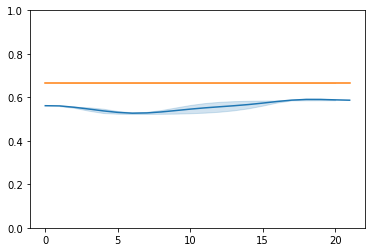

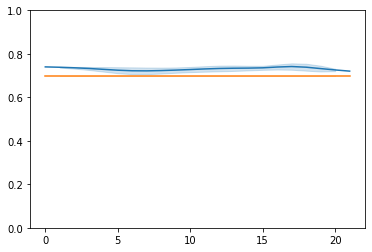

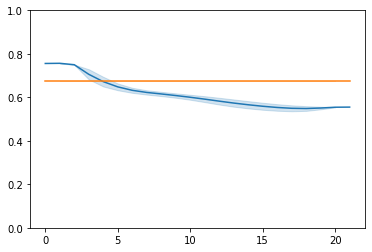

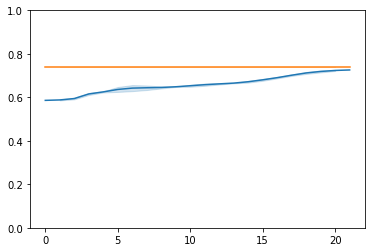

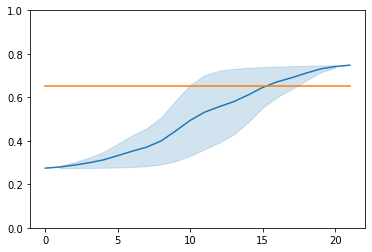

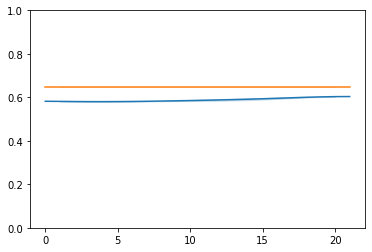

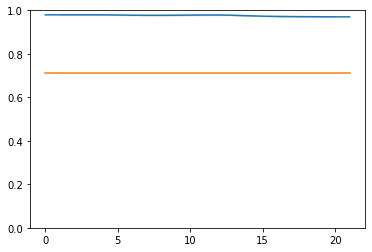

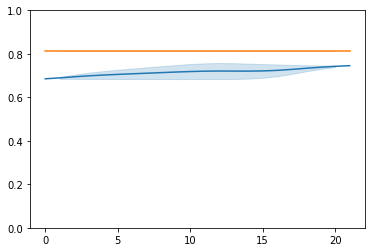

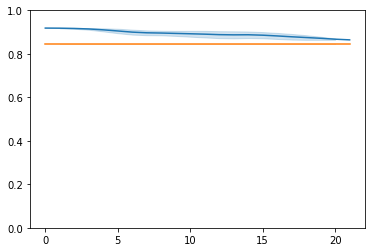

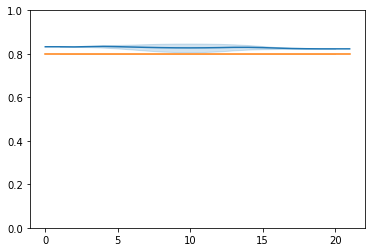

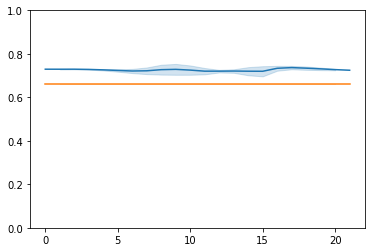

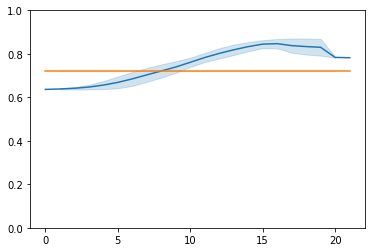

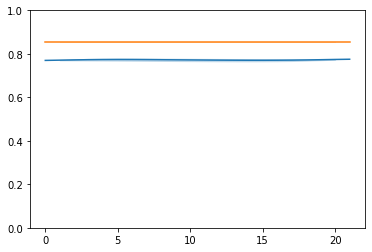

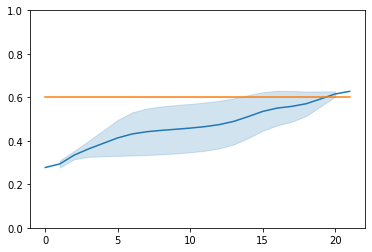

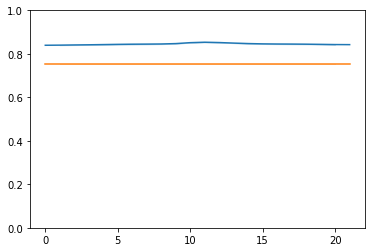

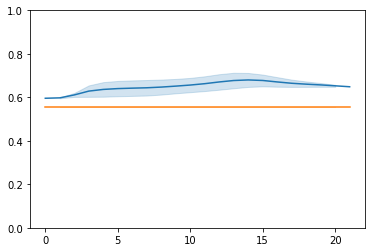

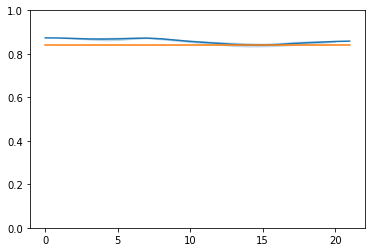

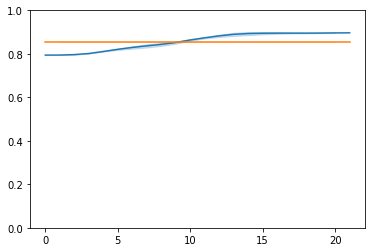

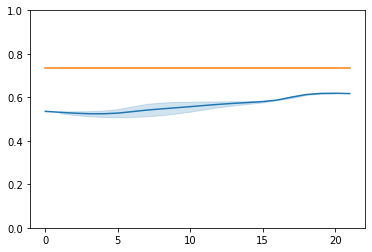

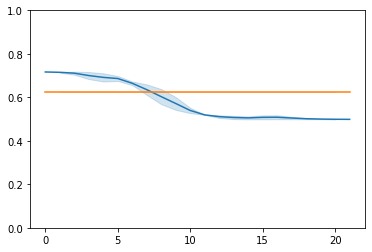

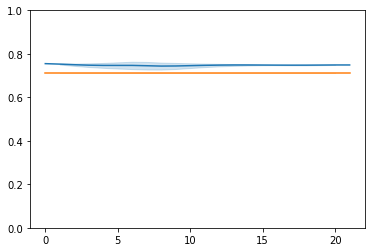

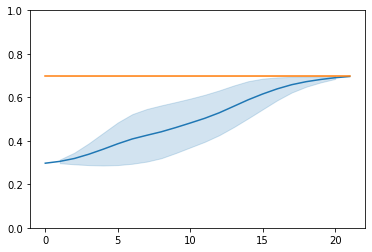

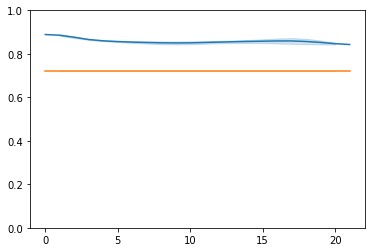

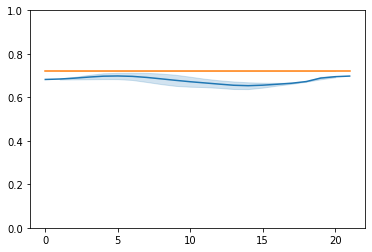

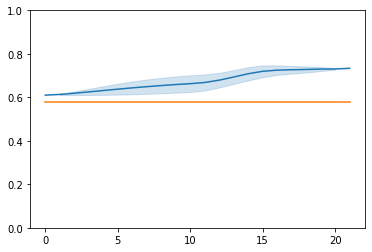

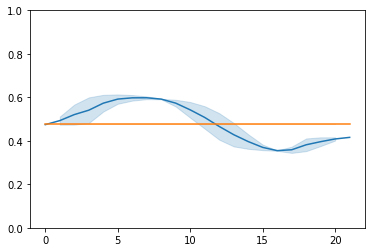

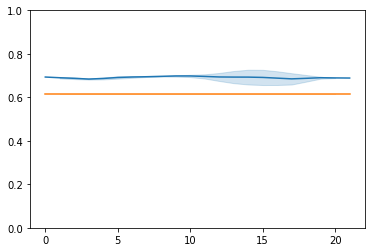

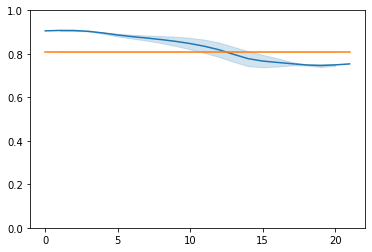

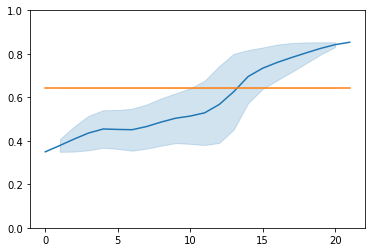

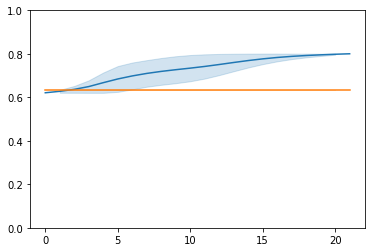

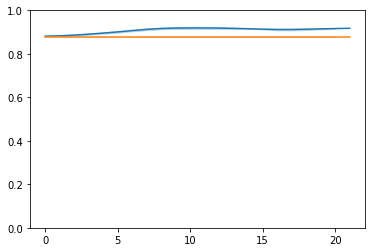

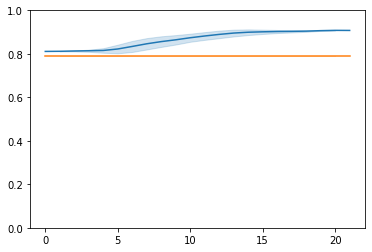

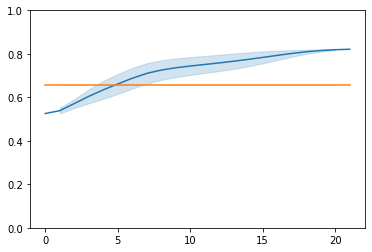

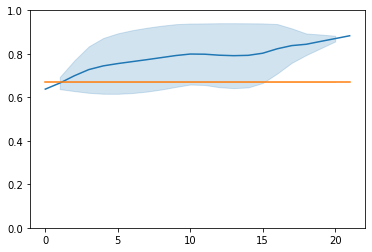

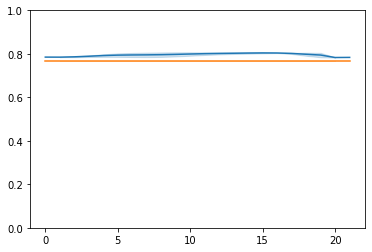

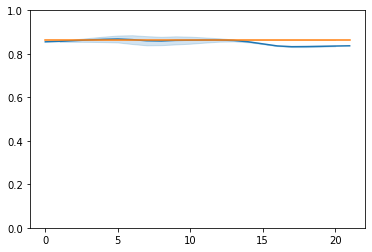

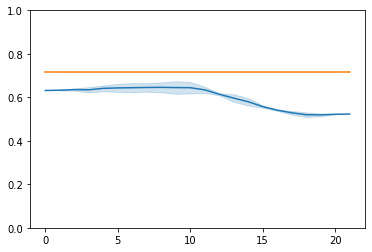

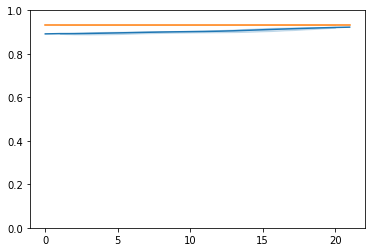

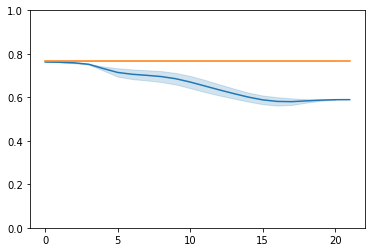

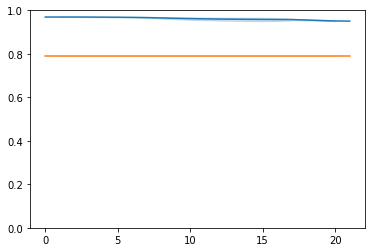

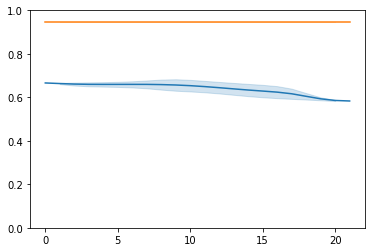

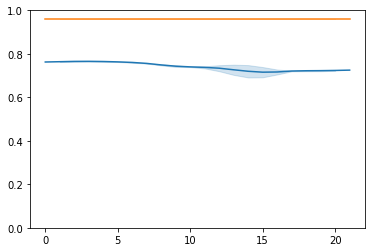

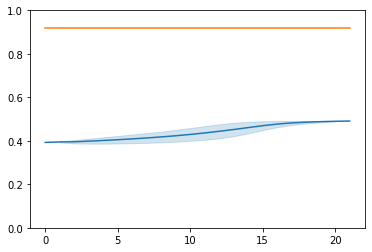

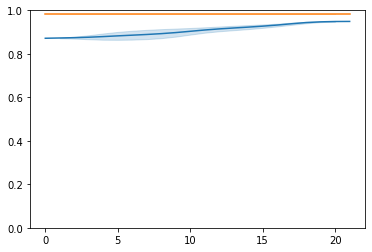

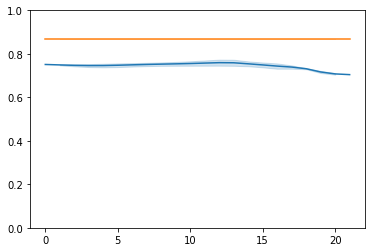

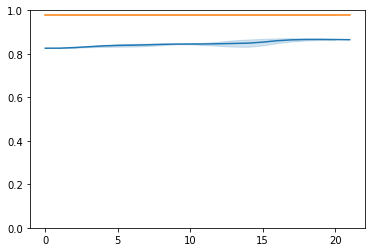

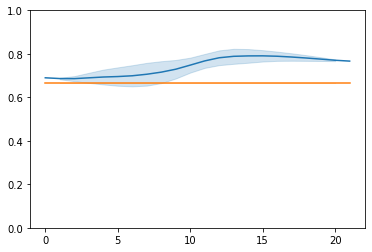

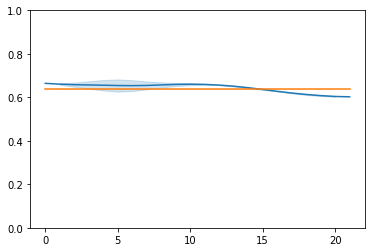

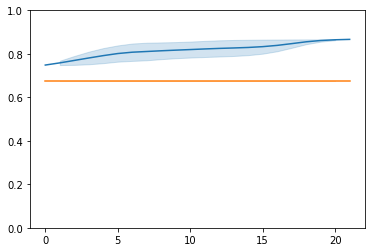

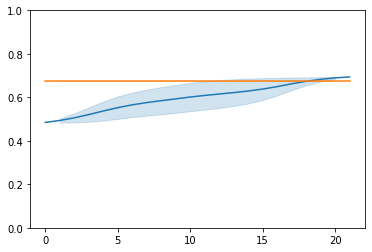

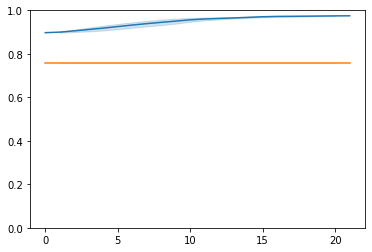

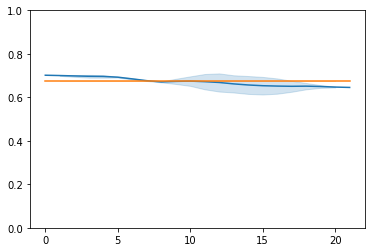

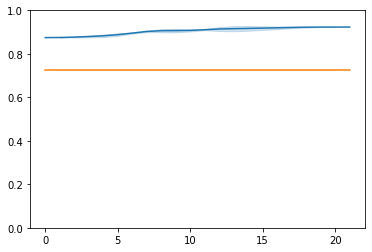

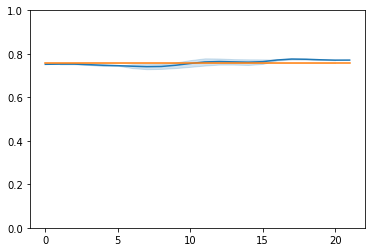

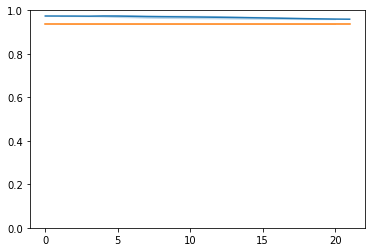

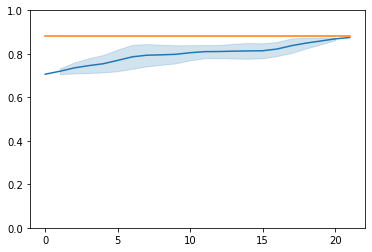

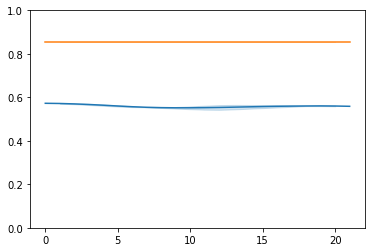

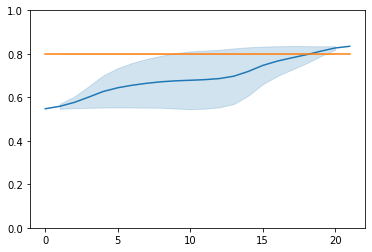

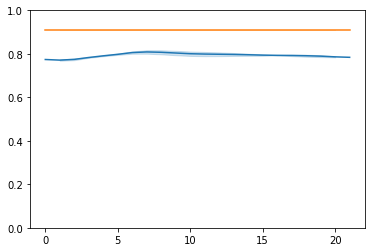

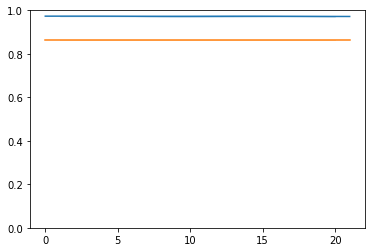

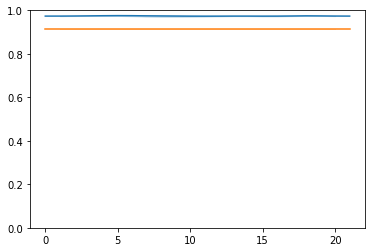

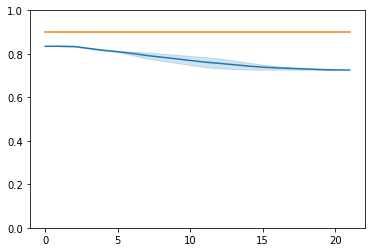

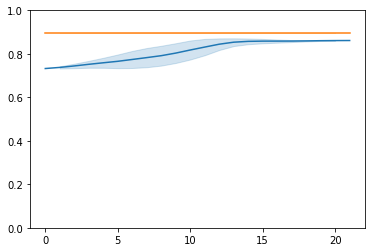

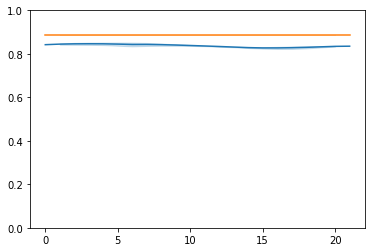

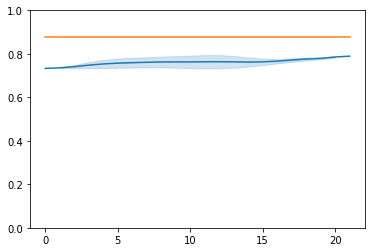

In [46]:
for lo_id in problems_dic.keys():
    preds = []
    for s in simu:
        res = predict_ks_from_history([{"lo_id": lo_id, "answer_result": a} for a in s])
        pred = [r['skill_pred'] for r in res if r['lo_id'] == lo_id]
        preds.append(*pred)
    plt.ylim(0, 1)
    sns.lineplot([sum(s) for s in simu], preds)
    sns.lineplot([sum(s) for s in simu], [correctness[problems_dic[lo_id]]]*len(preds))
    plt.show()